# **Import Libraries and modules**

In [3]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.regularizers import l2
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


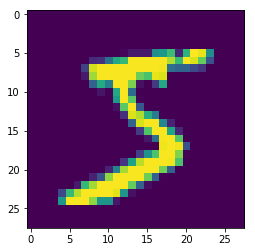

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0,featurewise_center=True, featurewise_std_normalization=True)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
train_iterator = datagen.flow(X_train, Y_train, batch_size=64, shuffle=False)
val_iterator = datagen.flow(X_test, Y_test, batch_size=64, shuffle=False)

In [13]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1), kernel_regularizer=l2(0.01))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) # 12
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01))) # 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01))) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 

model.add(Convolution2D(12, 1, 1, activation='relu')) # 8

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01))) # 6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01))) # 4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1)) 


model.add(Convolution2D(10, 1, activation='relu', kernel_regularizer=l2(0.01))) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/i

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])
!mkdir "Assignment5"
filepath="Assignment5//maxAccuracy.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]


In [18]:
model.fit_generator(train_iterator, steps_per_epoch=train_iterator.n//train_iterator.batch_size, verbose=1,nb_epoch=40, validation_data=val_iterator,validation_steps = val_iterator.n//val_iterator.batch_size, callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=937, verbose=1, validation_data=<keras_pre..., validation_steps=156, callbacks=[<keras.ca..., epochs=40)`
  """Entry point for launching an IPython kernel.


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
937/937 [==============================] - 14s 15ms/step - loss: 0.2370 - acc: 0.9626 - val_loss: 0.4209 - val_acc: 0.9012

Epoch 00001: val_acc improved from -inf to 0.90117, saving model to Assignment5//maxAccuracy.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
937/937 [==============================] - 13s 14ms/step - loss: 0.1953 - acc: 0.9684 - val_loss: 0.1960 - val_acc: 0.9633

Epoch 00002: val_acc improved from 0.90117 to 0.96326, saving model to Assignment5//maxAccuracy.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
937/937 [==============================] - 13s 13ms/step - loss: 0.1706 - acc: 0.9710 - val_loss: 0.1701 - val_acc: 0.9687

Epoch 00003: val_acc improved from 0.96326 to 0.96870, saving model to Assignment5//maxAccuracy.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
93

In [0]:
model.load_weights('Assignment5//maxAccuracy.hdf5')

In [20]:
score = model.evaluate_generator(val_iterator, steps=len(val_iterator))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [21]:
print(score)

[0.053269310754537585, 0.9921]


In [0]:
y_pred = model.predict(X_test)

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 2.3645089e-10 6.7411304e-02 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3258864e-01 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.5702854e-27 0.0000000e+00 3.4840546e-09 0.0000000e+00 3.1567571e-27
  3.7573460e-27 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 5.4913189e-27 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.2887679e-16
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [7.0813476e-18 0.0000000e+00 9.9999201e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 8.0450391e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.2872071e-34 0.0000000e+00 7.1483449e-04
  4.9095683e-20 0.0000000e+00 0.0000000e+00 6.1909481e-29 

In [24]:
import pandas as pd

val_iterator = datagen.flow(X_test, Y_test, batch_size=10000, shuffle=False)
x_val, y_val = next(val_iterator)
Y_val = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model.predict(x_val)
Y_pred = y_pred.argmax(axis=1)
d = {'pred': Y_pred, 'true': Y_val} #axis=1!important!
df=pd.DataFrame(data=d)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
MisIndex = df[(df.pred != df.true)].index

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

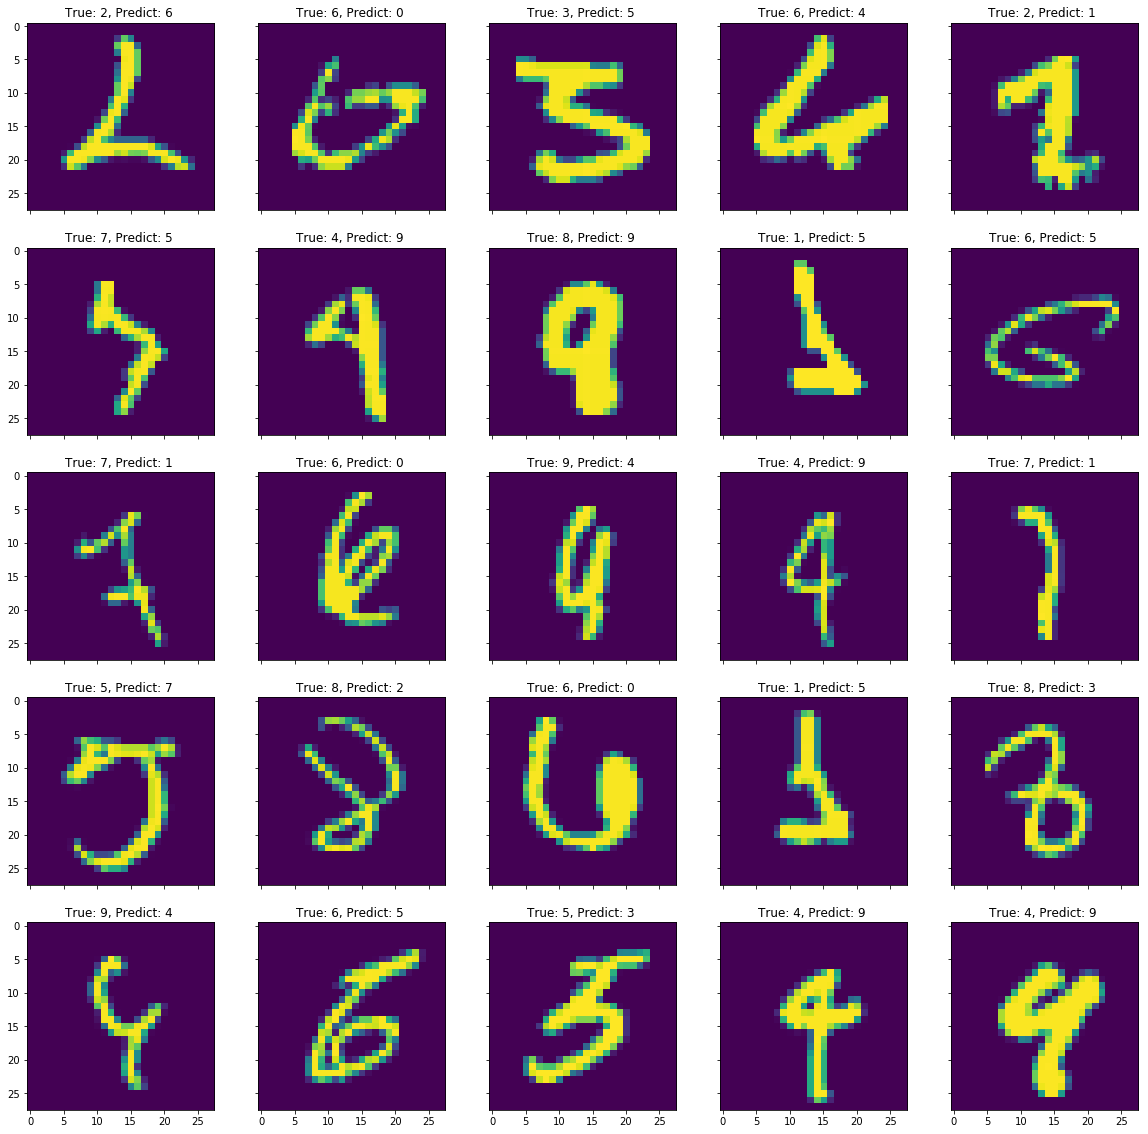

In [45]:
dim=5
fig, ax = plt.subplots(dim, dim, sharex='col', sharey='row', figsize=(20,20))
num=0
for i in range(dim):
    for j in range(dim):
        ax[i, j].imshow(X_test[MisIndex[num]])
        ax[i,j].set_title('True: %s, Predict: %s ' %(df.iloc[MisIndex[num]].true, df.iloc[MisIndex[num]].pred))
        num+=1